In [128]:
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline


In [112]:
ice_file=sorted(glob.glob('/ocean/xiaoxiny/research/data/forcing/Ice/*.nc'))#*_ptrc_T*.nc'))

In [113]:
#1958-1978
a=[700,605,519]#,578]
b=[210,265,335]#,312]
ice_series=[]
t=[]
col=['red','blue','green','cyan']


for i in range (len(ice_file)):
    anha=nc.Dataset(ice_file[i])
    anha_ice=anha.variables['ileadfra'][:]
    t.append(i+1958)
    ice_series.append(anha_ice[a,b])

In [114]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/NASA_ice/*09_*.nc'))#*_ptrc_T*.nc'))

In [115]:
#1979-
a_=[217,255,265]#,245] Nansen basin
b_=[90,138,185]#,163]

ice_series_=[ice_series[-1]]
t_=[t[-1]]
for i in range (len(nc_filename)):
    nasa=nc.Dataset(nc_filename[i])
    nasa_ice=nasa.variables['goddard_merged_seaice_conc_monthly'][0,a_,b_] 
    t_.append(i+1978)
    ice_series_.append(nasa_ice)

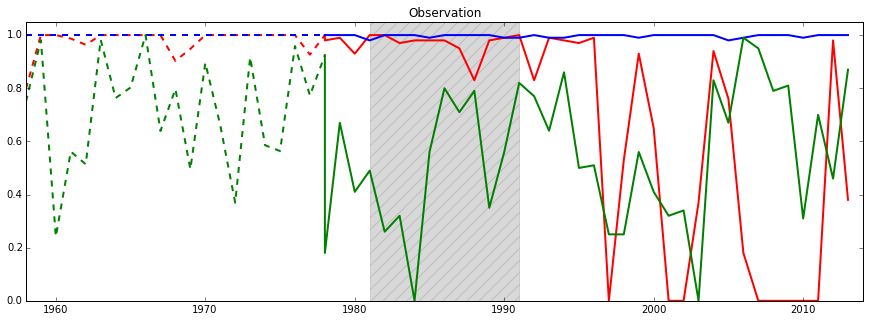

In [134]:
fig=plt.figure(figsize=(15,5))
for i in range (len(a)):
    plt.plot(t,np.array(ice_series)[:,i],color=col[i],lw=2,ls='--')#,label='The Walsh dataset')
    plt.plot(t_,np.array(ice_series_)[:,i],color=col[i],lw=2,ls='-')#, label=' GSFC Bootstrap sea ice conc.')
    

plt.axvspan(1981, 1991, hatch="//",alpha=0.3, color='grey')
plt.ylim(0,1.05);plt.xlim(1958,2014);plt.legend()
plt.title('Observation')
plt.show()

In [117]:
#Then look at ANHA's ice.

In [118]:
anha_filename=sorted(glob.glob('/ocean/xiaoxiny/ANHA4_ENG_ice/*09.nc'))#*_ptrc_T*.nc'))

In [119]:
a=[700,605,519]#,578]
b=[210,265,335]#,312]
ice_anha=[]
t_anha=[]
for i in range (len(anha_filename)):
    anha=nc.Dataset(anha_filename[i])
    anha_ice=anha.variables['ileadfra']
    t_anha.append(i+1958)
    ice_anha.append(anha_ice[0,a,b])

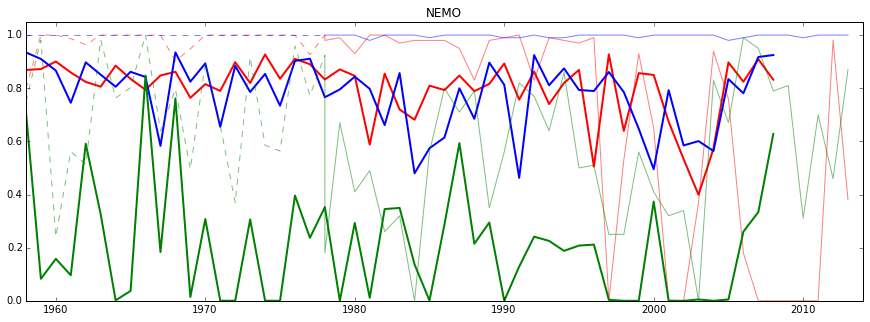

In [136]:
#ANHA
fig=plt.figure(figsize=(15,5))
for i in range (len(a)):
    plt.plot(t_anha,np.array(ice_anha)[:,i],color=col[i],lw=2)
    
    plt.plot(t,np.array(ice_series)[:,i],color=col[i],lw=1,ls='--',alpha=0.5)#,label='The Walsh dataset')
    plt.plot(t_,np.array(ice_series_)[:,i],color=col[i],lw=1,ls='-',alpha=0.5)#
plt.ylim(0,1.05);plt.xlim(1958,2014);plt.title('NEMO')

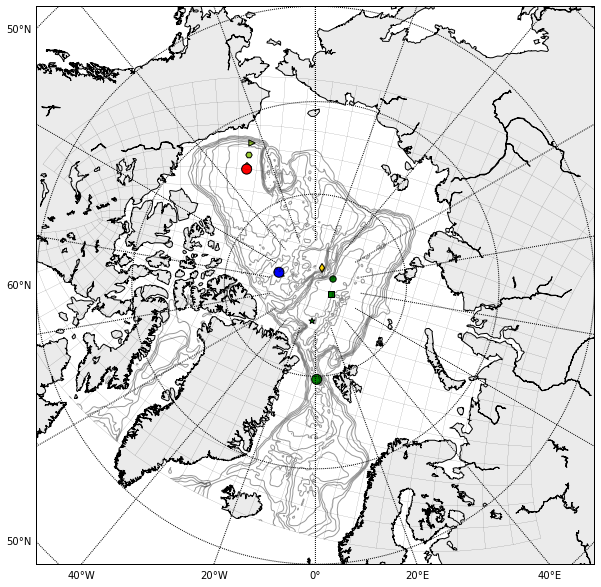

In [132]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*MIN*.nc'))#*_ptrc_T*.nc'))

ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)

nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']
i=0
for j in  ([0,5,6,7,8,11,12,13]):
    data=pd.read_csv(nc_filename_[j])
    lon_ = data['long.'];
    lat_ = data['lat.']; 
    y_lon, yy_lat = m(lon_[0], lat_[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40)
    i+=1

x_lon,y_lat = m(lon,lat)
plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)

a=[300,205,119]
b=[210,265,335]
col=['red','blue','green','cyan']
m.scatter(x_lon[a,b],y_lat[a,b],c=col,s=100)